In [2]:
%matplotlib inline
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


0.232951


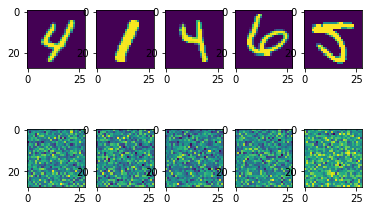

0.23260847


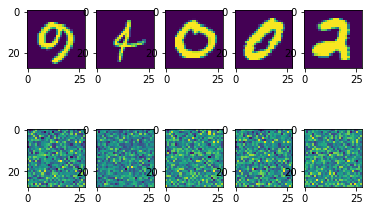

0.23352551


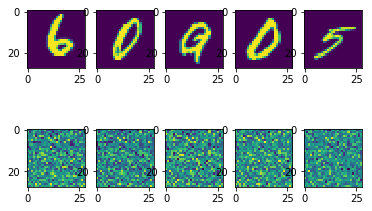

0.23227188


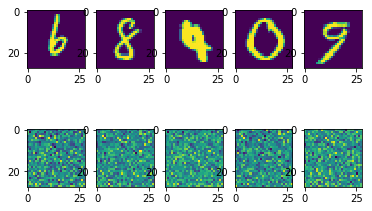

0.2309907


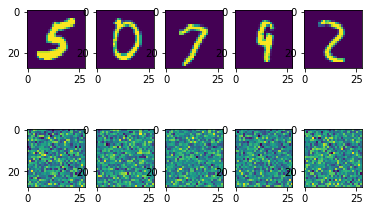

In [26]:
with tf.Graph().as_default() as g:
    inp_out = tf.placeholder(shape=[None,784],dtype=tf.float32)
    h = tf.keras.layers.Dense(32,activation=tf.nn.relu)(inp_out)#隐藏层神经元数量  激活函数 调用对象
    out = tf.keras.layers.Dense(784,activation=tf.nn.sigmoid)(h)
    
    loss = tf.reduce_mean(tf.keras.losses.mean_squared_error(inp_out, out))
    #saver = tf.train.Saver
    
with tf.Session (graph=g) as sess:
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.001) #梯度下降训练 比较原始 学习率
    train_op = optim.minimize(loss) #最小化代价
    sess.run(tf.global_variables_initializer())
    
    for i in range(500):
        batch_img, _ = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op],feed_dict={inp_out: batch_img})
        
        if i % 100 == 0:
            print(res_loss)
            batch_img, _ = mnist.test.next_batch(5)
            res_out = sess.run(out, feed_dict={inp_out: batch_img})
            for j in range(10):
                plt.subplot(2, 5, j + 1)
                img = batch_img[j] if j < 5 else res_out[j - 5]
                img = (img *255).astype(np.uint8).reshape([28, 28])
                plt.imshow(img)
            plt.show()